In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics


In [3]:
df_daily = pd.read_csv('/content/sample_data/EMBER european_wholesale_electricity_price_data_daily.csv')
df_monthly = pd.read_csv('/content/sample_data/EMBER european_wholesale_electricity_price_data_monthly.csv')

In [4]:
# Pivot the dataset so that countries become columns, and the rows are indexed by Date
df_monthly['Date'] = pd.to_datetime(df_monthly['Date'])
df_daily['Date'] = pd.to_datetime(df_daily['Date'])

df_daily_reshape = df_daily.pivot(index='Date', columns='Country', values='Price (EUR/MWhe)').sort_index(level='index', ascending=True)
df_monthly_reshape = df_monthly.pivot(index='Date', columns='Country', values='Price (EUR/MWhe)').sort_index(level='index', ascending=True)

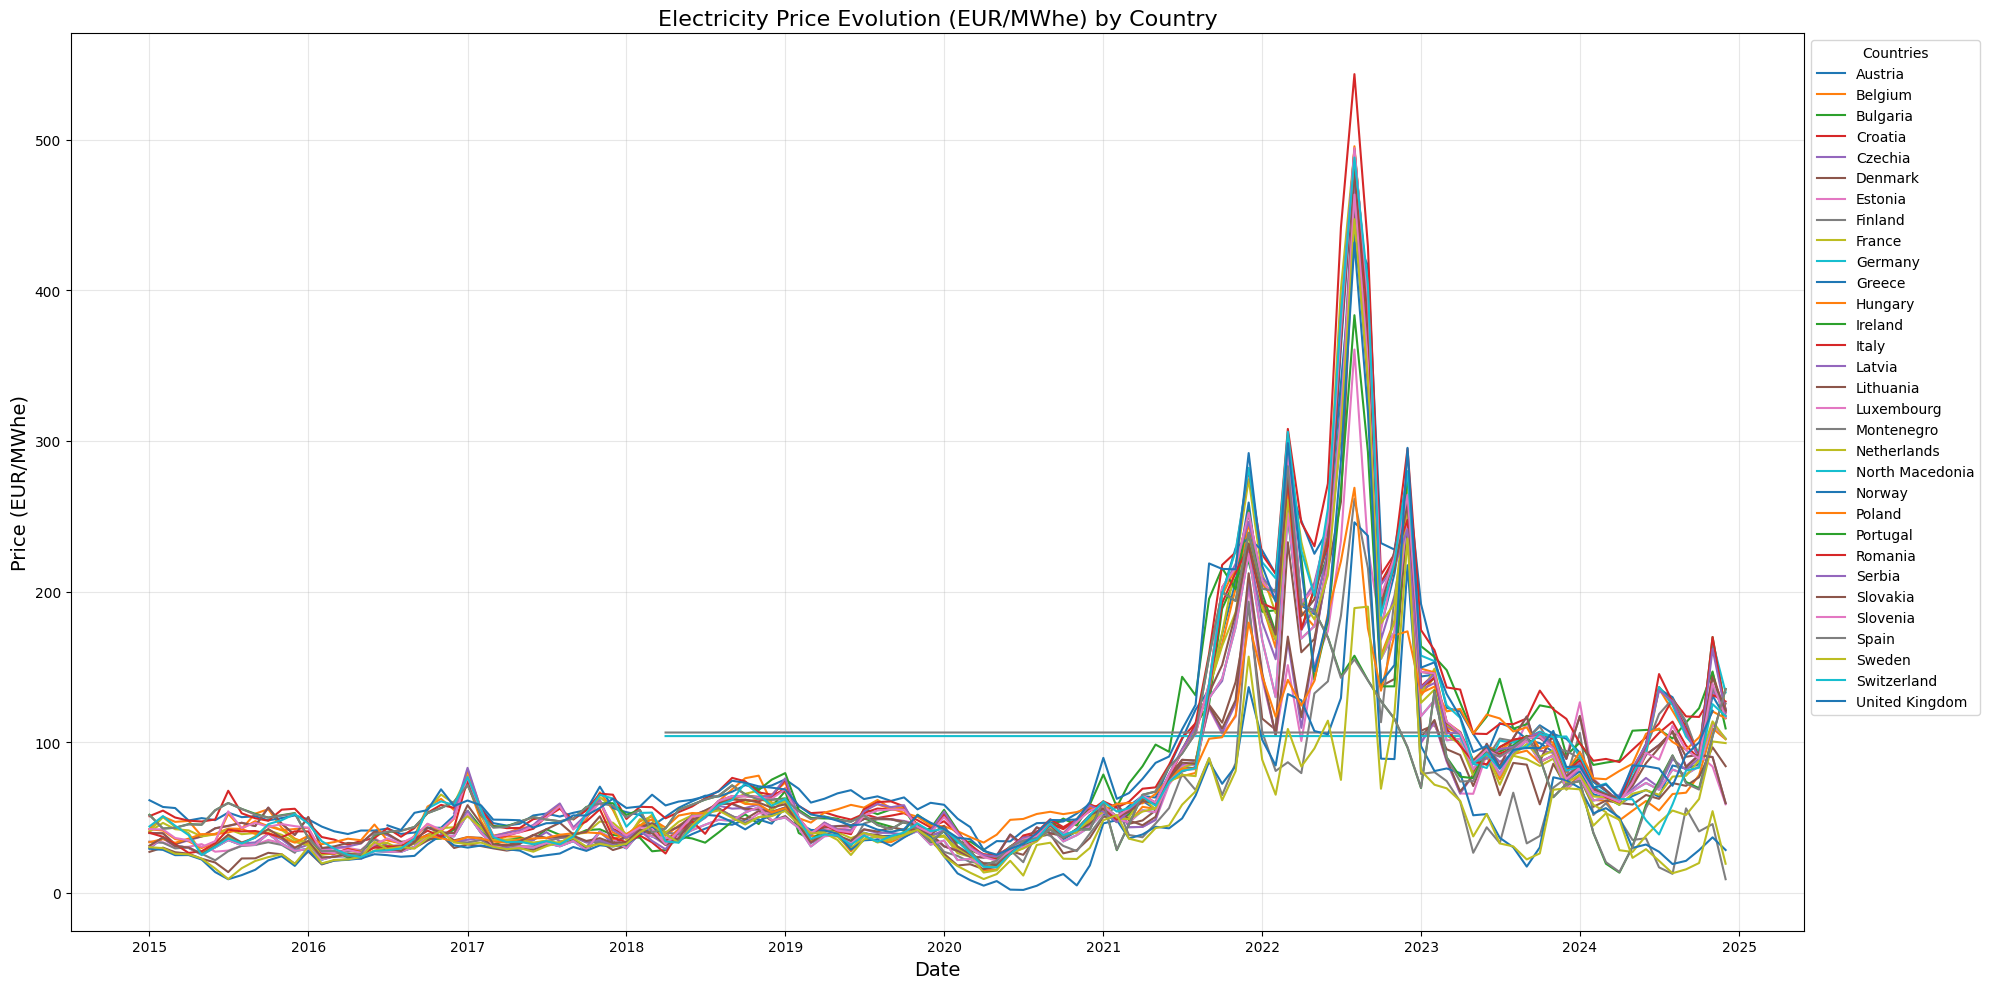

In [5]:
# Plot the line chart for electricity price evolution for each country
plt.figure(figsize=(20, 10))
for Country in df_monthly_reshape.columns:
    plt.plot(df_monthly_reshape.index, df_monthly_reshape[Country], label=Country)

# Customize the plot
plt.title('Electricity Price Evolution (EUR/MWhe) by Country', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (EUR/MWhe)', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Countries", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


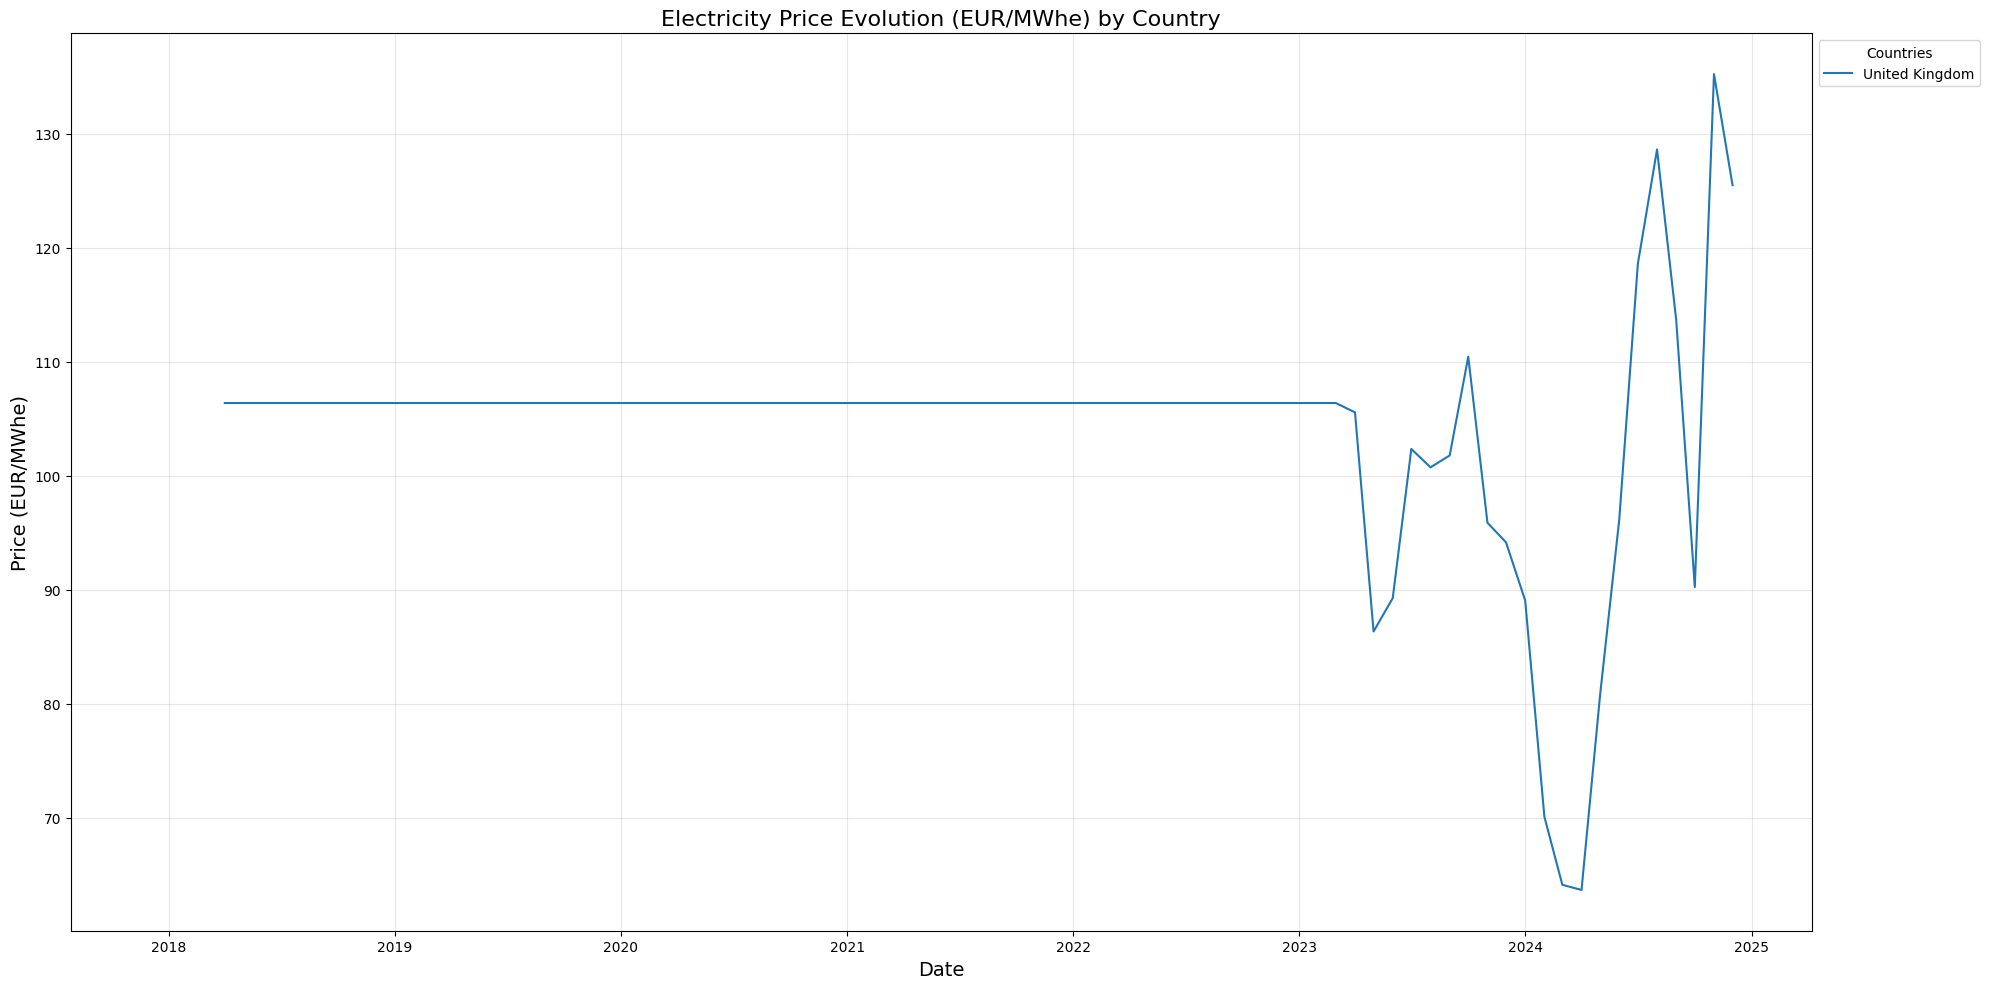

In [6]:
# Plot the line chart for electricity price evolution for a country
plt.figure(figsize=(20, 10))

plt.plot(df_monthly_reshape.index, df_monthly_reshape['Montenegro'], label=Country)

# Customize the plot
plt.title('Electricity Price Evolution (EUR/MWhe) by Country', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (EUR/MWhe)', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Countries", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

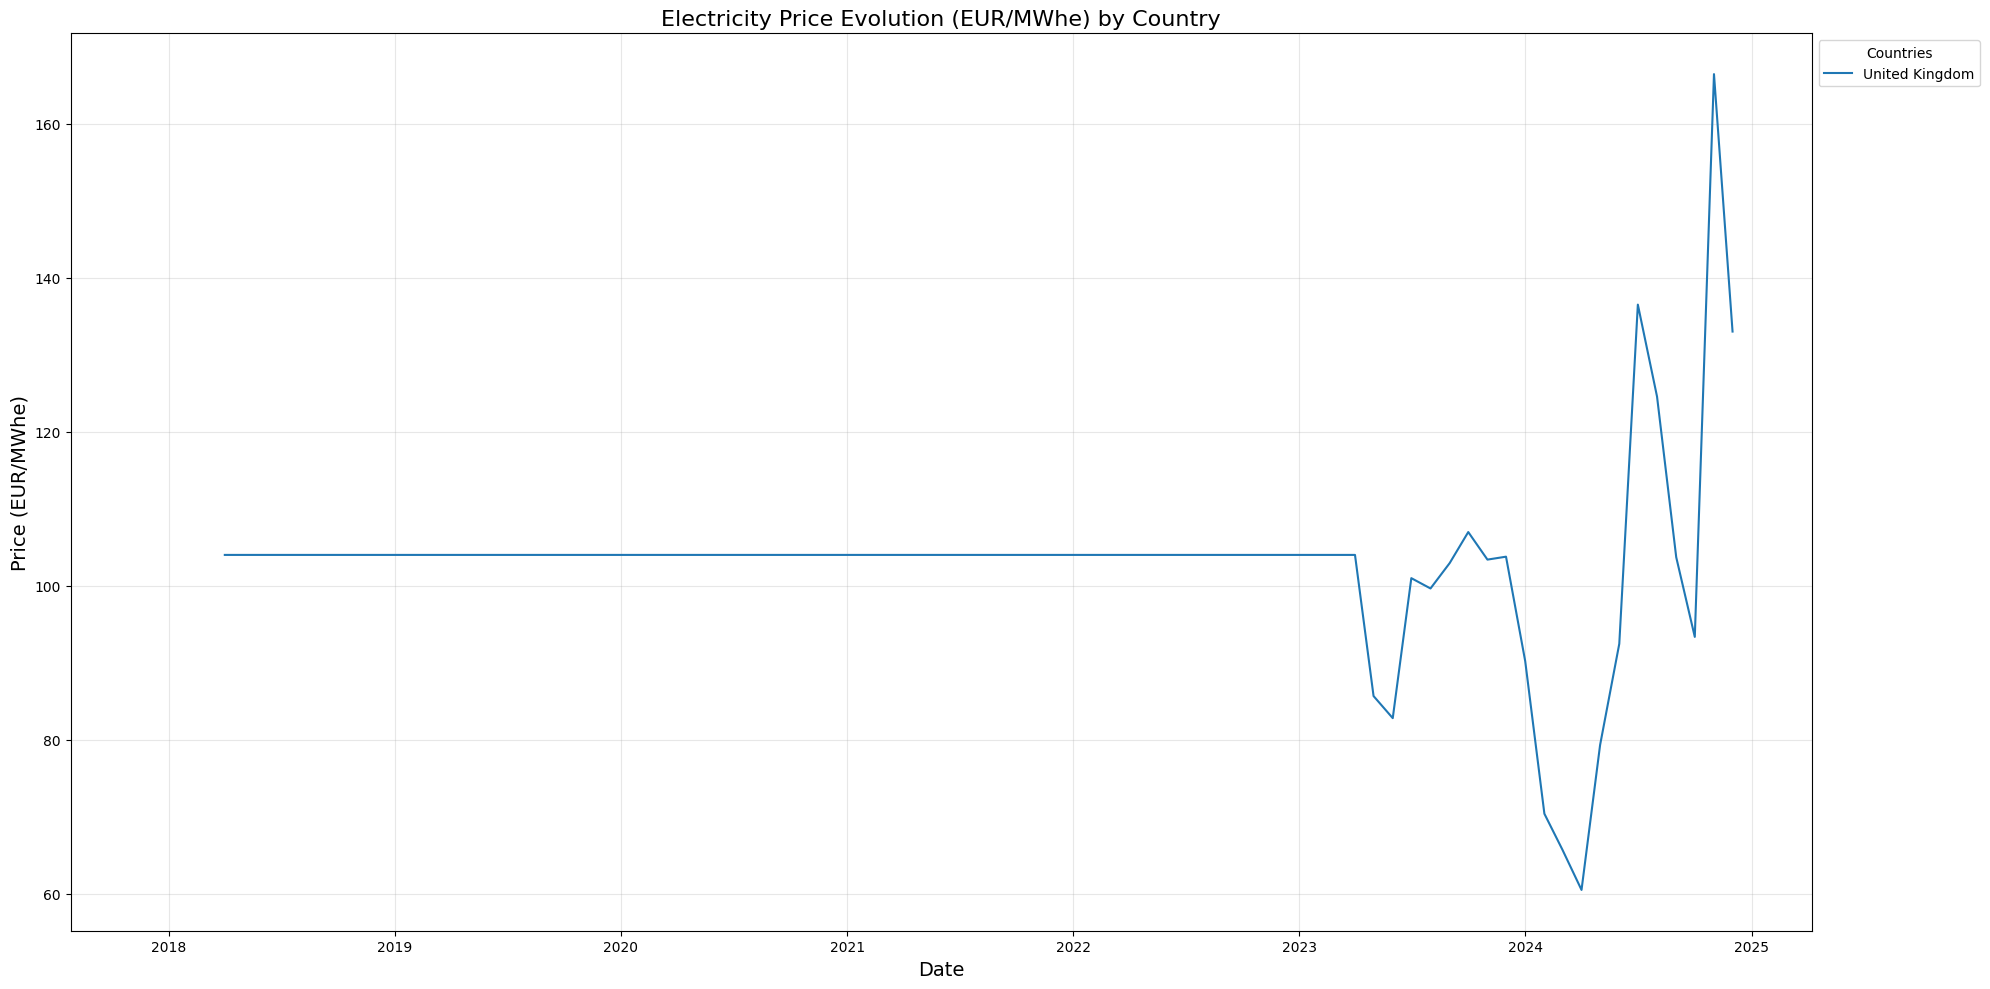

In [7]:
# Plot the line chart for electricity price evolution for a country
plt.figure(figsize=(20, 10))

plt.plot(df_monthly_reshape.index, df_monthly_reshape['North Macedonia'], label=Country)

# Customize the plot
plt.title('Electricity Price Evolution (EUR/MWhe) by Country', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (EUR/MWhe)', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Countries", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
del df_daily_reshape['Montenegro']
del df_monthly_reshape['Montenegro']
del df_daily_reshape['North Macedonia']
del df_monthly_reshape['North Macedonia']

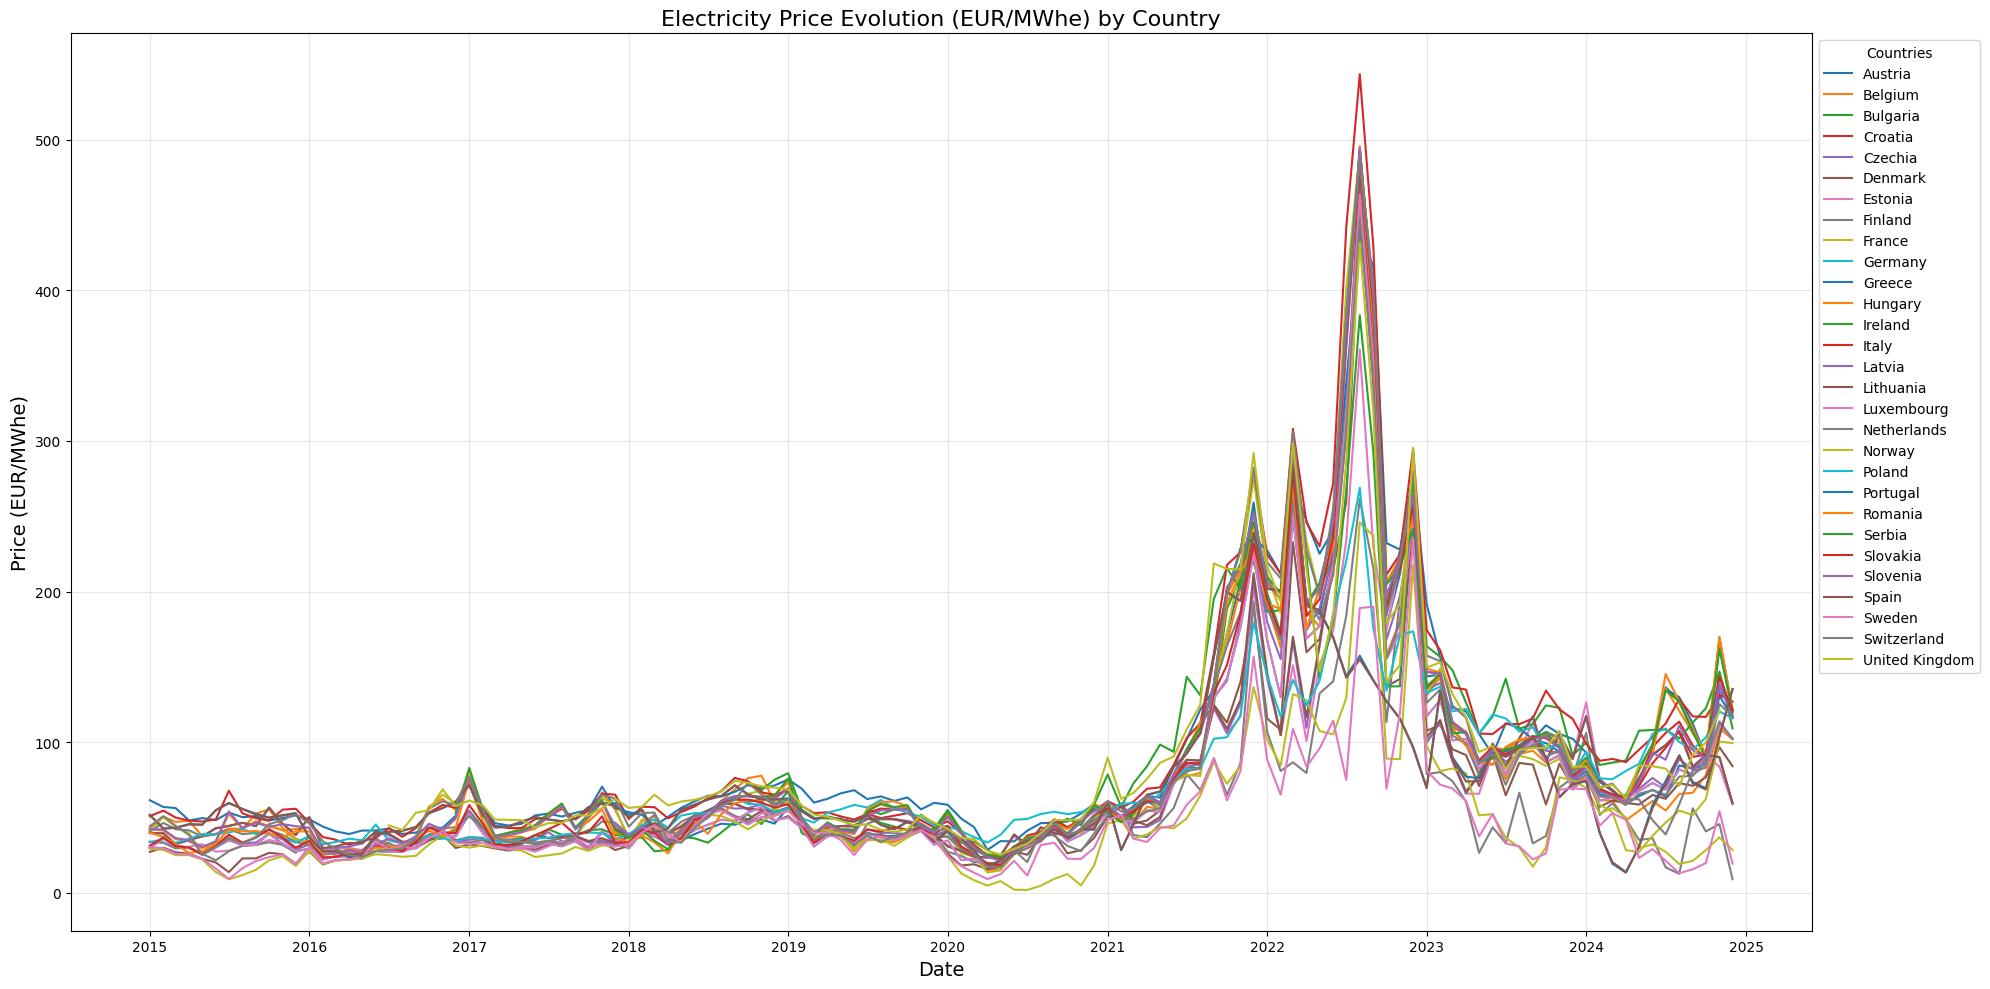

In [9]:
# Plot the line chart for electricity price evolution for each country
plt.figure(figsize=(20, 10))
for Country in df_monthly_reshape.columns:
    plt.plot(df_monthly_reshape.index, df_monthly_reshape[Country], label=Country)

# Customize the plot
plt.title('Electricity Price Evolution (EUR/MWhe) by Country', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (EUR/MWhe)', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Countries", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Identify the timeframe where the price had the smallest value for var of each country

var = df_monthly_reshape['Belgium'].min()
df_monthly_reshape.loc[df_monthly_reshape['Belgium'] == var]

Country,Austria,Belgium,Bulgaria,Croatia,Czechia,Denmark,Estonia,Finland,France,Germany,...,Poland,Portugal,Romania,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,United Kingdom
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,18.86,14.68,24.83,23.97,19.24,15.62,23.68,19.81,13.41,17.51,...,33.3,17.73,25.57,25.08,19.34,23.74,17.61,9.08,17.18,27.76


In [14]:
# Calculate the average price for each timeframe

df_monthly_reshape["Average_Price"] = df_monthly_reshape.iloc[:, 1:].mean(axis=1)

In [23]:
df_monthly_reshape

Country,Austria,Belgium,Bulgaria,Croatia,Czechia,Denmark,Estonia,Finland,France,Germany,...,Portugal,Romania,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,United Kingdom,Average_Price
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,29.94,42.33,NaN,NaN,29.47,27.12,33.84,33.81,40.94,29.94,...,51.77,39.80,NaN,31.26,42.23,51.48,30.24,44.00,NaN,38.921739
2015-02-01,36.69,50.54,NaN,NaN,36.12,29.93,33.43,33.15,50.14,36.69,...,42.61,37.12,NaN,36.65,42.02,42.60,29.60,50.86,NaN,40.443478
2015-03-01,31.30,47.05,NaN,NaN,30.61,26.88,30.30,29.42,43.79,31.30,...,43.18,32.25,NaN,30.96,36.34,43.08,25.88,44.48,NaN,36.230435
2015-04-01,29.78,47.69,NaN,NaN,29.84,25.91,30.49,30.09,39.52,29.78,...,45.54,26.42,NaN,29.97,34.81,45.37,25.50,38.23,NaN,35.286522
2015-05-01,25.33,37.58,NaN,NaN,25.39,22.56,32.27,25.84,26.46,25.33,...,45.21,27.56,NaN,25.61,30.40,45.17,22.59,25.04,NaN,32.251739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,84.48,65.53,126.65,113.61,88.79,72.78,106.95,12.53,54.56,81.76,...,91.16,126.86,127.12,107.34,110.96,91.10,12.95,58.66,71.01,89.063214
2024-09-01,82.40,66.41,106.69,97.70,81.62,70.97,83.90,56.02,51.61,78.55,...,73.54,109.19,106.89,90.28,94.63,72.54,15.53,81.07,91.56,82.724286
2024-10-01,85.35,78.13,89.60,89.05,89.16,76.68,91.49,40.69,62.25,83.98,...,69.36,89.96,89.16,91.58,89.02,68.49,19.72,83.04,99.80,82.467500


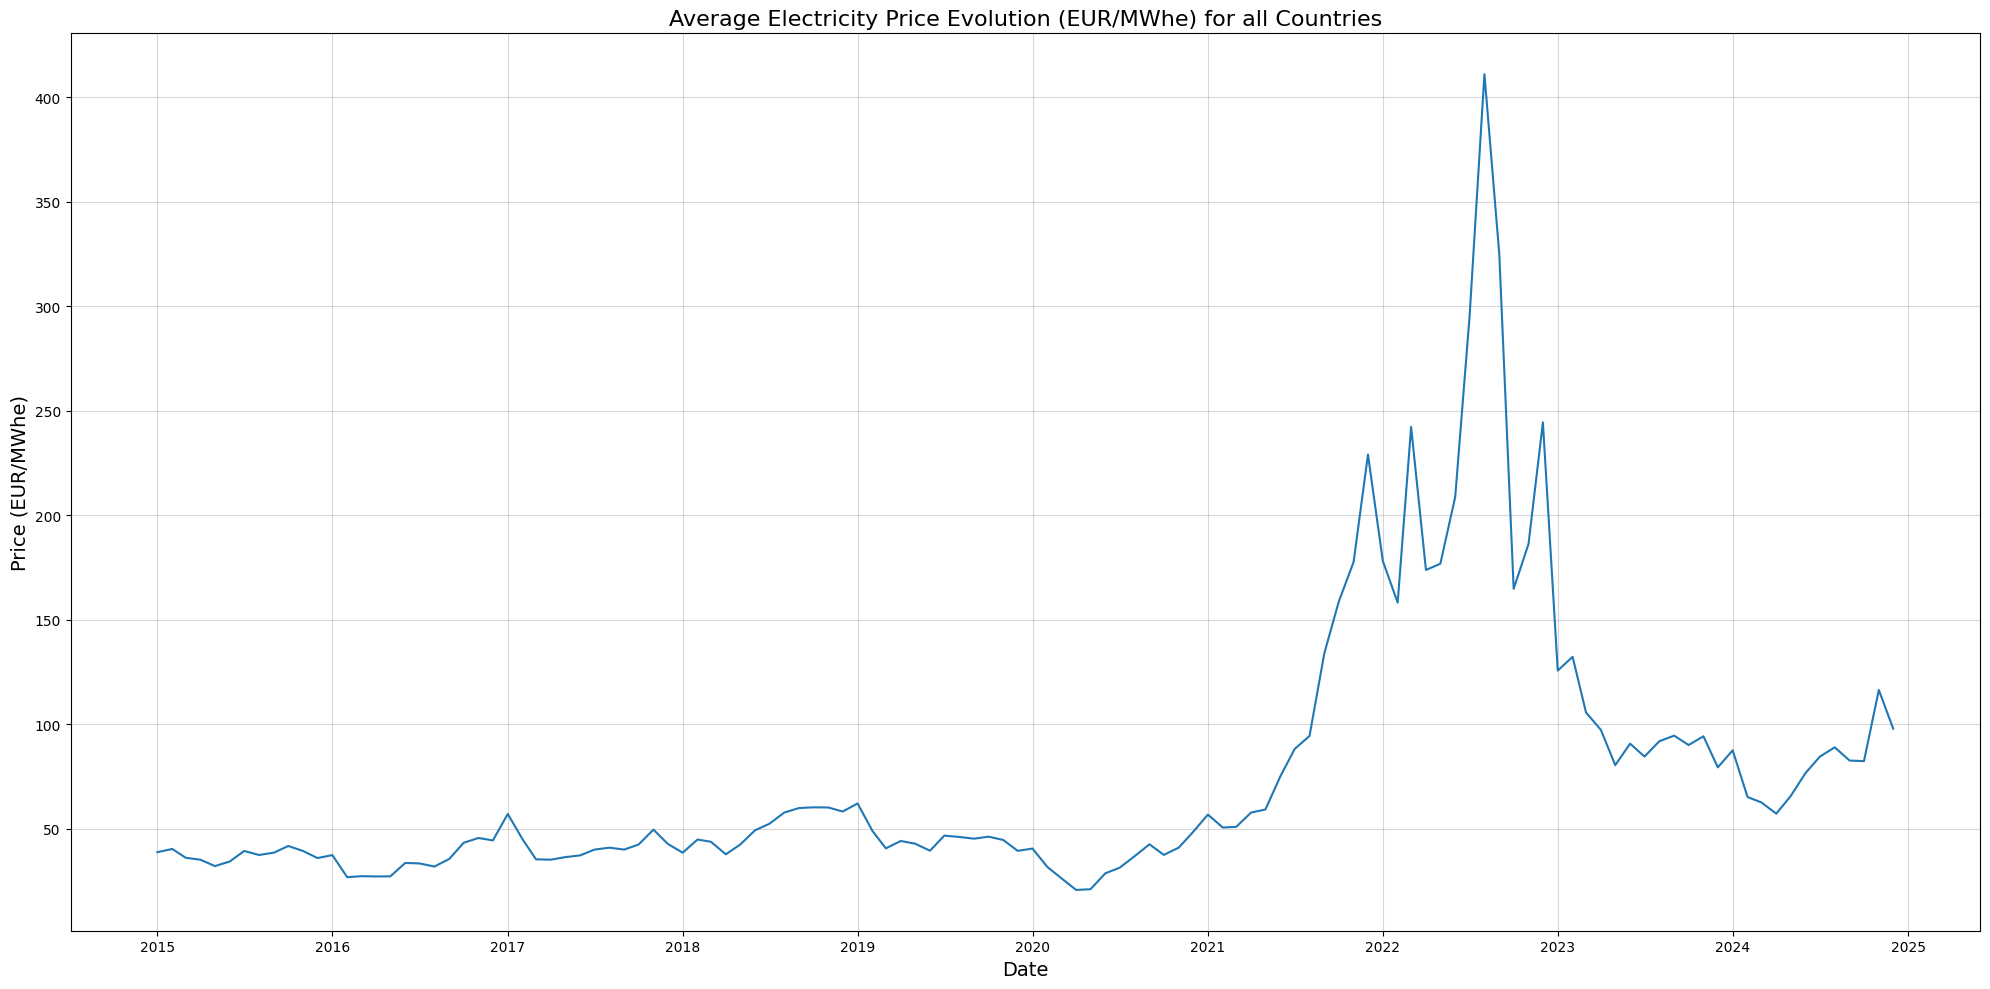

In [15]:
# Plot the line chart for average electricity price evolution for all countries

plt.figure(figsize=(20, 10))

plt.plot(df_monthly_reshape.index, df_monthly_reshape['Average_Price'], label=Country)

# Customize the plot
plt.title('Average Electricity Price Evolution (EUR/MWhe) for all Countries', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (EUR/MWhe)', fontsize=14)
plt.grid(alpha=.5)
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
# Replace missing values with the row's average price

df_monthly_reshape_filled = df_monthly_reshape.copy()
numeric_columns = df_monthly_reshape.columns  # Exclude the 'Date' column

# Replace NaN with the average price of the month (row-wise mean)

df_monthly_reshape_filled[numeric_columns] = df_monthly_reshape[numeric_columns].apply(
    lambda row: row.fillna(row.mean()), axis=1
)

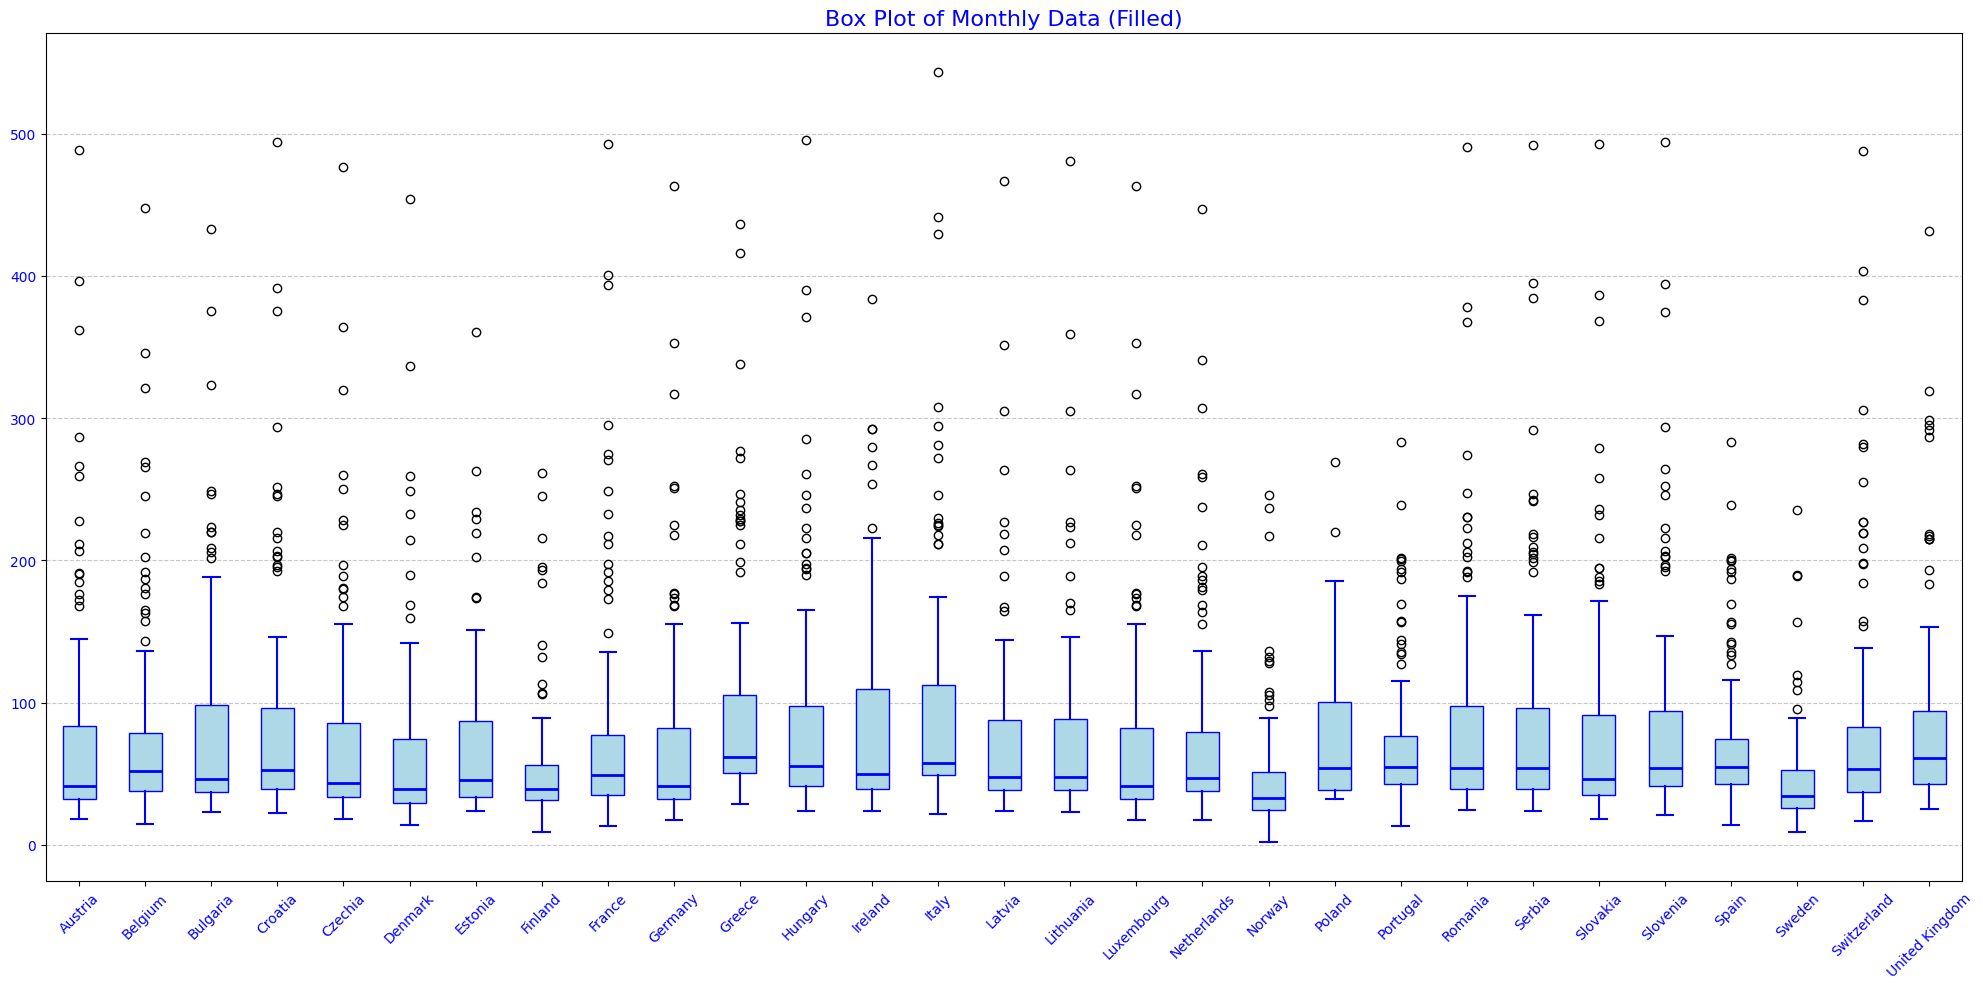

In [17]:
# Generate the box plot

plt.figure(figsize=(20, 10))
plt.boxplot(df_monthly_reshape_filled.iloc[:, :-1].values,  # Exclude the 'Date' column
            labels=df_monthly_reshape_filled.columns[:-1],  # Column names for labels
            patch_artist=True,  # To allow color customization
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='blue', linewidth=2),
            whiskerprops=dict(color='blue', linewidth=1.5),
            capprops=dict(color='blue', linewidth=1.5))

# Add title and format the x-axis labels
plt.title('Box Plot of Monthly Data (Filled)', fontsize=16, color='blue')
plt.xticks(rotation=45, fontsize=10, color='blue')
plt.yticks(fontsize=10, color='blue')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

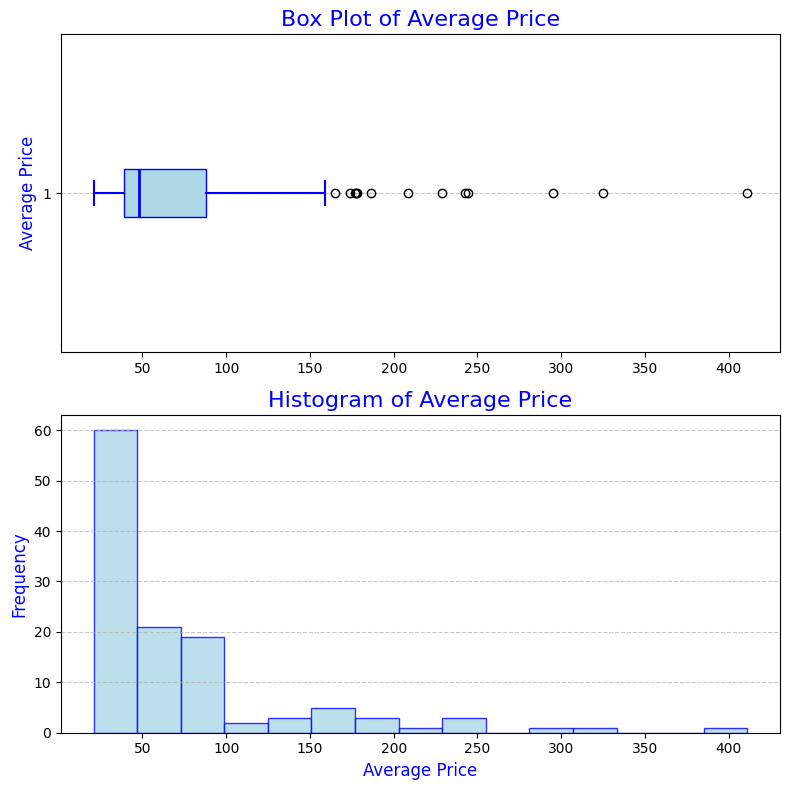

In [18]:
# Create a figure with two subplots: box plot and histogram

fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Box plot for the 'Average_Price' column
axes[0].boxplot(df_monthly_reshape_filled['Average_Price'],
                patch_artist=True,  # Allow color customization
                vert = False,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='blue', linewidth=2),
                whiskerprops=dict(color='blue', linewidth=1.5),
                capprops=dict(color='blue', linewidth=1.5))
axes[0].set_title('Box Plot of Average Price', fontsize=16, color='blue')
axes[0].set_ylabel('Average Price', fontsize=12, color='blue')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histogram for the 'Average_Price' column
axes[1].hist(df_monthly_reshape_filled['Average_Price'], bins=15, color='lightblue', edgecolor='blue', alpha=0.8)
axes[1].set_title('Histogram of Average Price', fontsize=16, color='blue')
axes[1].set_xlabel('Average Price', fontsize=12, color='blue')
axes[1].set_ylabel('Frequency', fontsize=12, color='blue')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [19]:
# Calculate the variance to see which country has more instability in prices. Load them into a df

Var = []
for Country in df_monthly_reshape_filled.columns[:-1]:
    variance = statistics.variance(df_monthly_reshape_filled[Country])
    Var.append(
        {
            'Country': Country,
            'Variance': variance,
        }
    )

df_var = pd.DataFrame(Var).sort_values(by='Variance', ascending=True)

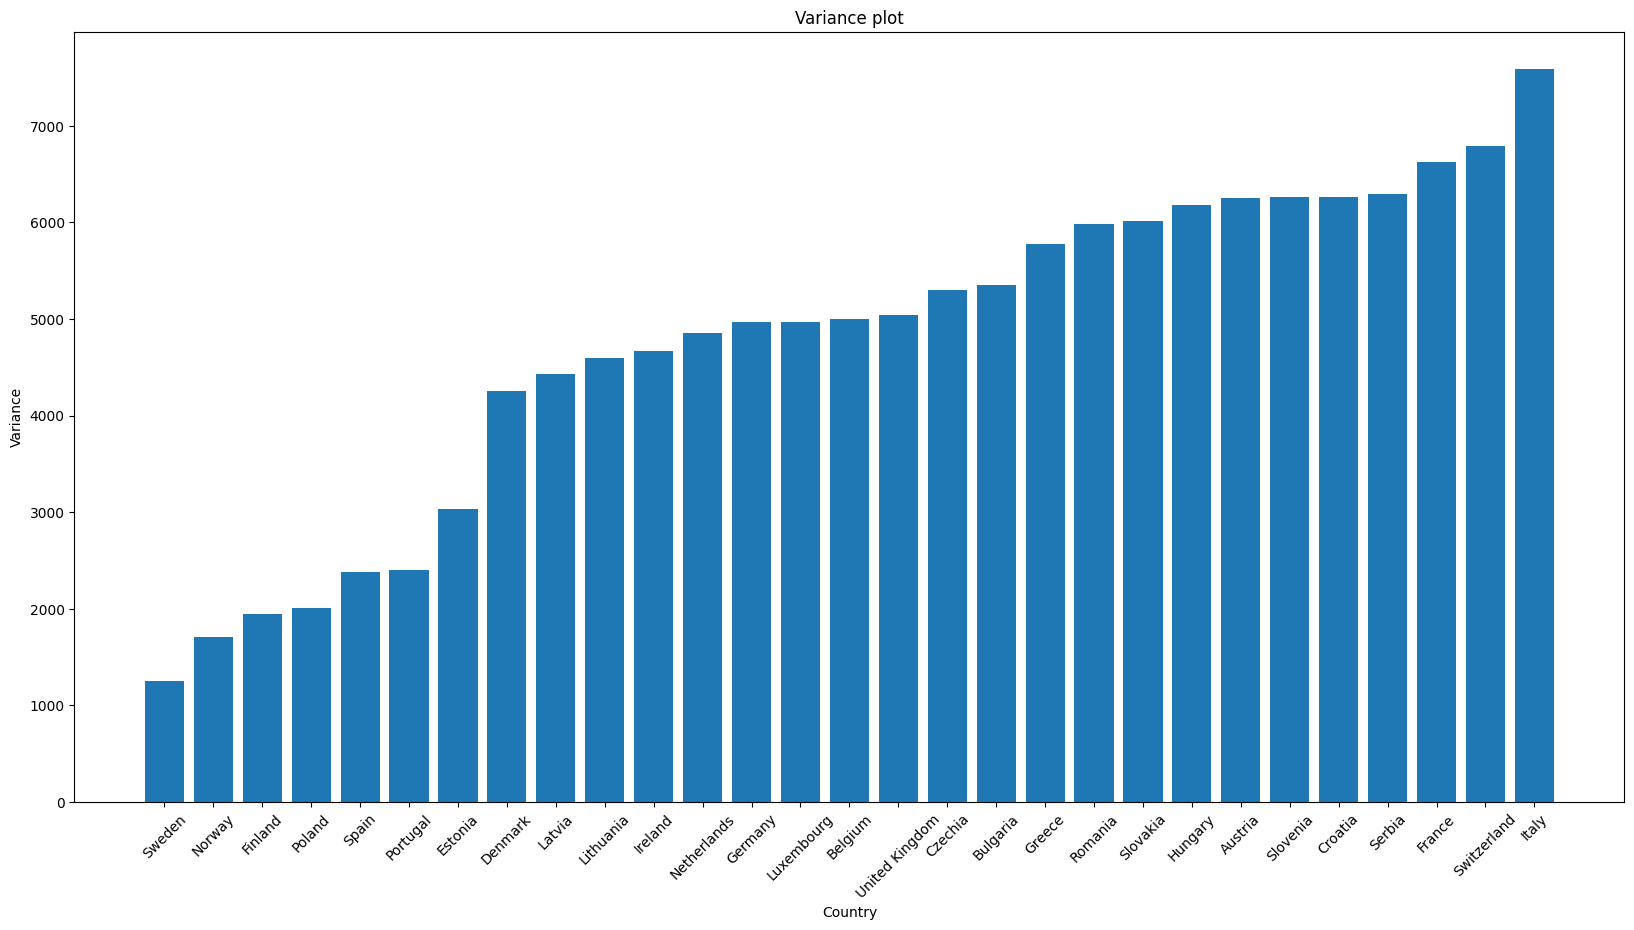

In [20]:
# Plot the variance data


plt.figure(figsize=(20, 10))
plt.bar(df_var['Country'], df_var['Variance'])
plt.title('Variance plot')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Variance')
plt.show()

Small variance means less instability in prices. One cause of this may be that nordic countries use a lot of renewable energy which may keep the price more stable in times of crises

<Figure size 2000x800 with 0 Axes>

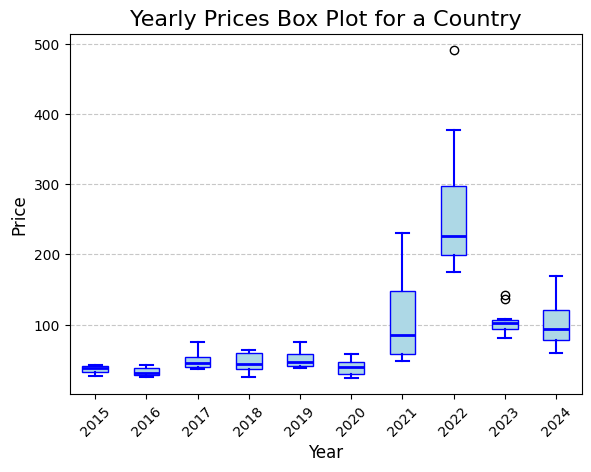

In [22]:
# Create a box plot evolution for a specific country

df_monthly_reshape_filled['Year'] = df_monthly_reshape_filled.index.year

# Melt the DataFrame to have one column for all observations
df_melted = df_monthly_reshape_filled.melt(id_vars=['Year'], var_name='Country', value_name='Price')

# Filter the DataFrame for the specific country
df_country = df_melted.loc[df_melted['Country'] == 'Romania']

# Create a box plot grouped by year

%matplotlib inline

plt.figure(figsize=(20, 8))
df_country.boxplot(column='Price', by='Year', grid=False, patch_artist=True,
                  boxprops=dict(facecolor='lightblue', color='blue'),
                  medianprops=dict(color='blue', linewidth=2),
                  whiskerprops=dict(color='blue', linewidth=1.5),
                  capprops=dict(color='blue', linewidth=1.5))
plt.title('Yearly Prices Box Plot for a Country', fontsize=16)
plt.suptitle('')  # Remove automatic boxplot title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()